# word2vec Approach

BoW and TF-IDF consist of a set of words (vocabulary) and a metric like frequency or term frequency-inverse document frequency (TF-IDF) to describe each word’s value in the corpus. That means BoW and TF-IDF can result in sparse matrices and high dimensional vectors that consume a lot of computer resources if the vocabulary is very large.

Developed by a team of researchers at Google, word2vec attempts to solve the issues with the BoW approach:
*   High-dimension vectors
*   Words assumed completely independent of each other

Using a neural network with only a couple layers, word2vec tries to learn relationships between words and embeds them in a lower-dimensional vector space. To do this, word2vec trains words against other words that neighbor them in the input corpus, capturing some of the meaning in the sequence of words. The researchers devised two novel approaches:
*   Continuous bag of words (CBoW)
*   Skip-gram

The CBoW architecture predicts the current word based on the context while the skip-gram predicts surrounding words given the current word.

**CBoW :** Given a set of (neighbouring) words, **guess single words** that potentially occur along with this set of words.

**Skip-gram :** **Guess potential neighboring words** based on the single word being analyzed  

Both approaches result in a vector space that maps word-vectors close together based on contextual meaning. That means, if two word-vectors are close together, those words should have similar meaning based on their context in the corpus.

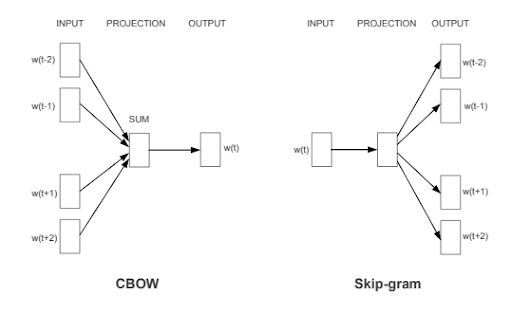

# word2vec Implementation using Gensim Library

In [ ]:
#Importing dependancies
from gensim.models import Word2Vec, FastText
import pandas as pd
import re

from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import plotly.graph_objects as go

import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
sentences = [['Natural', 'language', 'processing', 'is', 'fun', 'and', 'interesting'],
           ['Natural', 'language', 'processing', 'is', 'fun'],
           ['Hindi', 'language', 'is', 'interesting']]

Note that the sentences have been tokenized since we want to generate embeddings at the word level, not by sentence. Now we can run the sentences through the word2vec model.

In [ ]:
# train word2vec model
#w2v =Word2Vec(sentences, size=2, alpha=0.025)
w2v = Word2Vec(sentences, min_count=1, size = 2)

print(w2v)

Word2Vec(vocab=8, size=2, alpha=0.025)


When printed, the model displays the count of unique vocab words, array size and learning rate (default .025)

In [ ]:
# access vector for one word
print(w2v['language'])

#list the vocabulary words
words = list(w2v.wv.vocab)

print(words)

#or show the dictionary of vocab words
w2v.wv.vocab

[-0.06693748 -0.03051319]
['Natural', 'language', 'processing', 'is', 'fun', 'and', 'interesting', 'Hindi']


{'Natural': <gensim.models.keyedvectors.Vocab at 0x7f6644f314f0>,
 'language': <gensim.models.keyedvectors.Vocab at 0x7f6644f31790>,
 'processing': <gensim.models.keyedvectors.Vocab at 0x7f6644f31490>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7f6644f316a0>,
 'fun': <gensim.models.keyedvectors.Vocab at 0x7f6644f31820>,
 'and': <gensim.models.keyedvectors.Vocab at 0x7f6644f315e0>,
 'interesting': <gensim.models.keyedvectors.Vocab at 0x7f6644f31e20>,
 'Hindi': <gensim.models.keyedvectors.Vocab at 0x7f6644f31910>}

**VISUALIZE EMBEDDINGS**

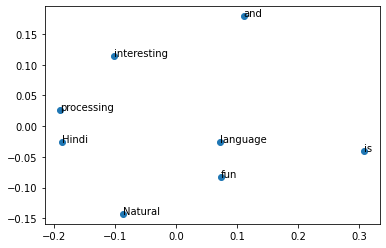

In [ ]:
X = w2v[w2v.wv.vocab]
pca = PCA(n_components=2)

result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(w2v.wv.vocab)

for i, word in enumerate(words):
   plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

Our corpus is tiny so it is easy to visualize; however, it’s hard to decipher any meaning from the plotted points since the model had so little information from which to learn.

# **Visualizing Email Dataset Word Embeddings**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ACADEMIC YEAR 2022-23 SEMESTER II/LP-VI Lab Assignments/NLP/emails.csv')

In [ ]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


**Data Cleaning**

In [ ]:
clean_txt = []
for w in range(len(df.text)):
   desc = df['text'][w].lower()

   #remove punctuation
   desc = re.sub('[^a-zA-Z]', ' ', desc)

   #remove tags
   desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)

   #remove digits and special chars
   desc=re.sub("(\\d|\\W)+"," ",desc)
   clean_txt.append(desc)

df['clean'] = clean_txt
df.head()

,text,spam,clean
0,Subject: naturally irresistible your corporate...,1,subject naturally irresistible your corporate ...
1,Subject: the stock trading gunslinger fanny i...,1,subject the stock trading gunslinger fanny is ...
2,Subject: unbelievable new homes made easy im ...,1,subject unbelievable new homes made easy im wa...
3,Subject: 4 color printing special request add...,1,subject color printing special request additio...
4,"Subject: do not have money , get software cds ...",1,subject do not have money get software cds fro...


**Creating Corpus and Vector**

In [ ]:
corpus = []
for col in df.clean:
   word_list = col.split(" ")
   corpus.append(word_list)

#show first value
print(corpus[0:1])
print(len(corpus))

#generate vectors from corpus
model = Word2Vec(corpus, min_count=1, size = 56)

[['subject', 'naturally', 'irresistible', 'your', 'corporate', 'identity', 'lt', 'is', 'really', 'hard', 'to', 'recollect', 'a', 'company', 'the', 'market', 'is', 'full', 'of', 'suqgestions', 'and', 'the', 'information', 'isoverwhelminq', 'but', 'a', 'good', 'catchy', 'logo', 'stylish', 'statlonery', 'and', 'outstanding', 'website', 'will', 'make', 'the', 'task', 'much', 'easier', 'we', 'do', 'not', 'promise', 'that', 'havinq', 'ordered', 'a', 'iogo', 'your', 'company', 'will', 'automaticaily', 'become', 'a', 'world', 'ieader', 'it', 'isguite', 'ciear', 'that', 'without', 'good', 'products', 'effective', 'business', 'organization', 'and', 'practicable', 'aim', 'it', 'will', 'be', 'hotat', 'nowadays', 'market', 'but', 'we', 'do', 'promise', 'that', 'your', 'marketing', 'efforts', 'will', 'become', 'much', 'more', 'effective', 'here', 'is', 'the', 'list', 'of', 'clear', 'benefits', 'creativeness', 'hand', 'made', 'original', 'logos', 'specially', 'done', 'to', 'reflect', 'your', 'distinc

The data has been tokenized and is ready to be vectorized!

**Visualizing Email Dataset Word Vectors**

In [ ]:
#pass the embeddings to PCA
X = model[model.wv.vocab]
words_list = list(model.wv.vocab)
print(len(words_list))
pca = PCA(n_components=2)
result = pca.fit_transform(X)

#create df from the pca results
pca_df = pd.DataFrame(result, columns = ['x','y'])

#add the words for the hover effect
pca_df['word'] = words_list
pca_df.head()
pca_df

33715


,x,y,word
0,0.457135,2.498262,subject
1,0.365060,0.109267,naturally
2,-0.222138,-0.221582,irresistible
3,6.177703,-5.798908,your
4,2.348782,2.179319,corporate
...,...,...,...
33710,-0.348704,-0.236174,selectable
33711,-0.311514,-0.279343,hypercube
33712,-0.299495,-0.292167,toughest
33713,-0.311940,-0.271894,critic


In [ ]:
N = 1000000
words = list(model.wv.vocab)
fig = go.Figure(data=go.Scattergl(
   x = pca_df['x'],
   y = pca_df['y'],
   mode='markers',
   marker=dict(
       color=np.random.randn(N),
       colorscale='Viridis',
       line_width=1
   ),
   text=pca_df['word'],
   textposition="bottom center"
))

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [42]:
model.wv.most_similar('joe')

[('scott', 0.9339468479156494),
 ('nelson', 0.928282618522644),
 ('eric', 0.9210140109062195),
 ('kara', 0.9144555330276489),
 ('mrha', 0.9133355617523193),
 ('bennett', 0.9132177233695984),
 ('palmer', 0.9118150472640991),
 ('sally', 0.9114452004432678),
 ('lee', 0.9108055830001831),
 ('alison', 0.910140335559845)]

In [43]:
model.wv.most_similar_cosmul(positive = ['phone', 'number'], negative = ['call'])

[('cognizant', 1.060425877571106),
 ('address', 1.039358139038086),
 ('buiness', 1.038673758506775),
 ('patolia', 1.0339504480361938),
 ('courier', 1.0248805284500122),
 ('name', 1.0128659009933472),
 ('nondisclosure', 1.011989951133728),
 ('inboxes', 1.00129234790802),
 ('jisao', 0.9969928860664368),
 ('zip', 0.993704617023468)]